# BASIC AUTOENCODER

In [14]:
from keras.layers import Input, Dense
from keras.models import Model
%matplotlib inline

encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [15]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [16]:
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [17]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# SPARSE AUTOENCODER

In [18]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [19]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [20]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.3624 - val_loss: 0.2714
Epoch 2/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2650 - val_loss: 0.2546
Epoch 3/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2436 - val_loss: 0.2303
Epoch 4/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.2229 - val_loss: 0.2134
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.2084 - val_loss: 0.2011
Epoch 6/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.1974 - val_loss: 0.1911
Epoch 7/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.1885 - val_loss: 0.1833
Epoch 8/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.1812 - val_loss: 0.1767
Epoch 9/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.1751 - val_loss: 0.1712
Epoch

In [21]:
# encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

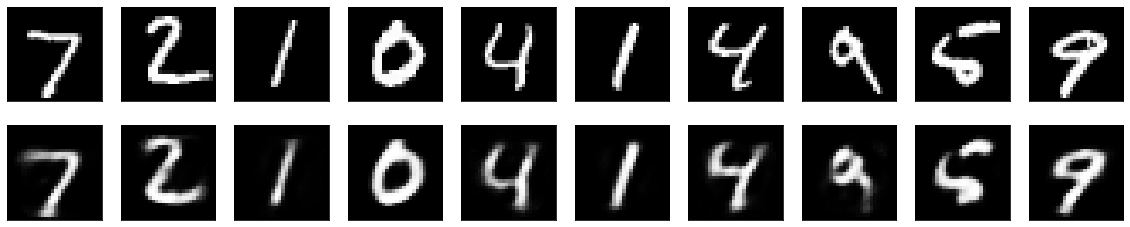

In [22]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [24]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [25]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.6735 - val_loss: 0.6485
Epoch 2/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.6284 - val_loss: 0.6090 ET
Epoch 3/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.5916 - val_loss: 0.5749- ETA: 2s - loss: - ETA: 2s - 
Epoch 4/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/100
60000/60000 [==============================] - 4s 69us/

Epoch 77/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.2828 - val_loss: 0.2826
Epoch 78/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.2825 - val_loss: 0.2823: 1s - lo - E
Epoch 79/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.2822 - val_loss: 0.2820
Epoch 80/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.2819 - val_loss: 0.281781
Epoch 81/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.2816 - val_loss: 0.2814
Epoch 82/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.2813 - val_loss: 0.2812
Epoch 83/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.2810 - val_loss: 0.2809
Epoch 84/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.2808 - val_loss: 0.2806
Epoch 85/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.2805 - val_loss: 0.2804
Epoch 86/100
60000/600

In [26]:
# encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

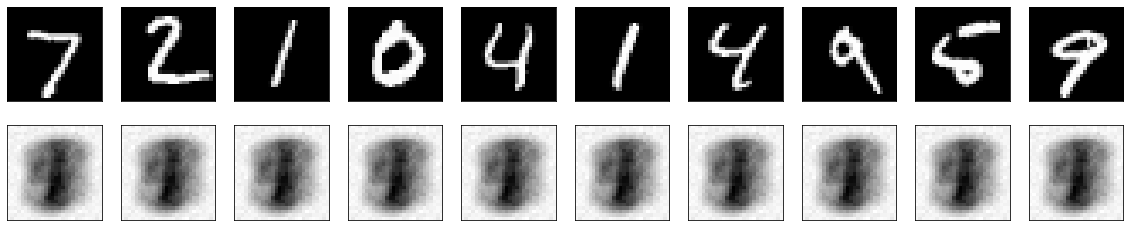

In [27]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# DEEP AUTOENCODER

In [28]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [29]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [30]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.3303 - val_loss: 0.2626
Epoch 2/100
60000/60000 [==============================] - 8s 129us/step - loss: 0.2515 - val_loss: 0.2408
Epoch 3/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.2305 - val_loss: 0.2201
Epoch 4/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.2133 - val_loss: 0.2066
Epoch 5/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.2010 - val_loss: 0.1958
Epoch 6/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.1890 - val_loss: 0.1833
Epoch 7/100
60000/60000 [==============================] - 8s 135us/step - loss: 0.1802 - val_loss: 0.1755
Epoch 8/100
60000/60000 [==============================] - 7s 120us/step - loss: 0.1730 - val_loss: 0.1681
Epoch 9/100
60000/60000 [==============================] - 8s 131us/step - loss: 0.1677 - val_

Epoch 77/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1039 - val_loss: 0.1066
Epoch 78/100
60000/60000 [==============================] - 7s 118us/step - loss: 0.1036 - val_loss: 0.1035
Epoch 79/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.1034 - val_loss: 0.1025
Epoch 80/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.1032 - val_loss: 0.1020
Epoch 81/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1030 - val_loss: 0.1014
Epoch 82/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.1026 - val_loss: 0.1008
Epoch 83/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1026 - val_loss: 0.1026
Epoch 84/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.1023 - val_loss: 0.1011
Epoch 85/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1021 - val_loss: 0.1028
Epoch 86/100
60000/60000 [========

In [31]:
# encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

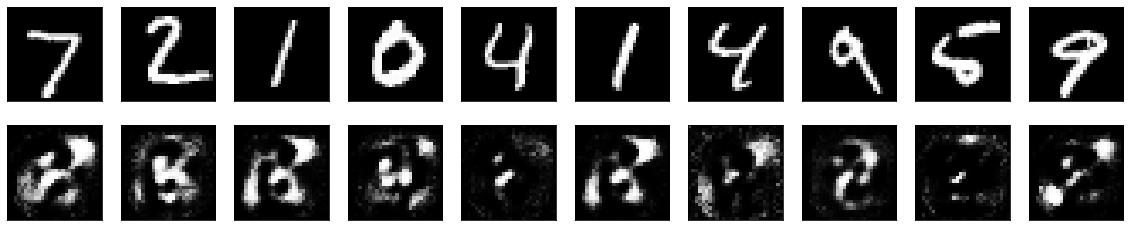

In [32]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()